# Plot AFAPE Results
Plot the results for different agents 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

In [2]:
# which dataset to work on 
dataset_name   = "synthetic_4"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# name for agents
agent_names  = ['DQN'] #, 'Random 10%']
agent_names  = ['Random 0% with TCN', 'Random 10% with TCN', 'Random 50% with TCN', 'Random 100% with TCN']
n_agents = len(agent_names) 

# name for mi datasets
mi_model_name = 'mi_simple'

# included estimators
included_estimator_types =  ['blocking', 'ground_truth', mi_model_name ]
included_estimator_types =  ['blocking', 'ground_truth', 'gaussian_process']

In [3]:
# other specifications 
data_dir       = "../../../data/ts/" + dataset_name + "/" + miss_scenario + "/" 
agent_dirs     = [data_dir + 'afa_agents' + '/' + agent_name + '/' for agent_name in agent_names]

# find all bootstrap results files
agent_bootstrap_files_list = []
for agent_i in range(n_agents):
    agent_bootstrap_files = {}
    for included_estimator_type in included_estimator_types:
        agent_bootstrap_files[included_estimator_type] = agent_dirs[agent_i] + included_estimator_type + '_' + 'J_bootstraps.hkl'
    agent_bootstrap_files_list.append(agent_bootstrap_files)

In [59]:
agent_bootstrap_files_list

[{'blocking': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 0% with TCN/blocking_J_bootstraps.hkl',
  'ground_truth': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 0% with TCN/ground_truth_J_bootstraps.hkl',
  'gaussian_process': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 0% with TCN/gaussian_process_J_bootstraps.hkl'},
 {'blocking': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 10% with TCN/blocking_J_bootstraps.hkl',
  'ground_truth': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 10% with TCN/ground_truth_J_bootstraps.hkl',
  'gaussian_process': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 10% with TCN/gaussian_process_J_bootstraps.hkl'},
 {'blocking': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 50% with TCN/blocking_J_bootstraps.hkl',
  'ground_truth': '../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 50% with TCN/ground_truth_J_bootstraps.hkl',
  'gaussian_process': '../../../data/ts/synthetic_4/MCAR_1/afa_ag

## Write a Report

In [4]:
from afa.afa_models.afa_estimators.afa_report import AFAReport

Agent:  Random 0% with TCN
\begin{longtable}{lrrr}
\hline
 Estimator        &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 IPW\_miss         &      0     &   0.937 &      1      \\
 IPW\_miss\_gt      &      0     &   0.937 &      1      \\
 IPW              &      0.937 &   0     &      0.0001 \\
 IPW,gt           &      0.937 &   0     &      0.0001 \\
 Blocking         &      0.937 &   0     &      0.0001 \\
 CC               &    nan     & nan     &    nan      \\
 Ground\_truth     &      0.937 &   0     &      0      \\
 gaussian\_process &      0.938 &   0     &      0.0003 \\
\hline
\end{longtable}
Agent:  Random 10% with TCN
\begin{longtable}{lrrr}
\hline
 Estimator        &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 IPW\_miss         &      0     &   1.683 &      1      \\
 IPW\_miss\_gt      &      0     &   1.683 &      1      \\
 IPW              &      3.71  &   2.027 &      1.2039 \\
 IPW,gt           &      3.646 &   1.963 &      1.1661 \\
 Block

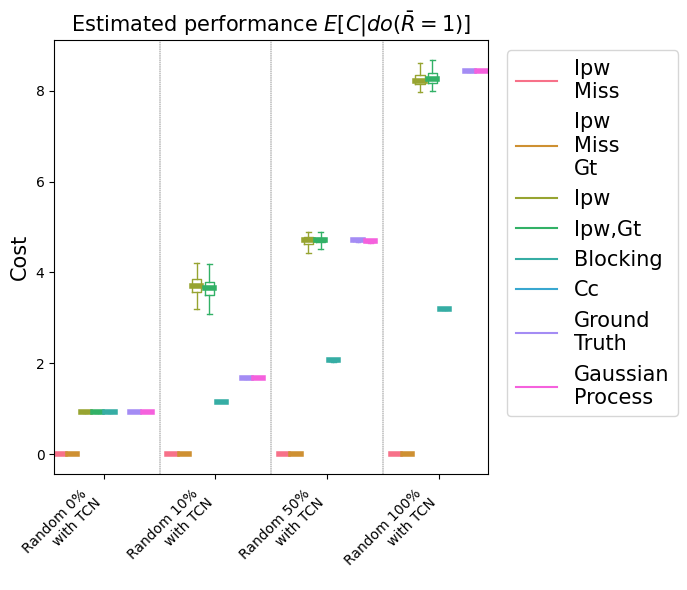

In [5]:
afa_report = AFAReport( agent_bootstrap_files_list = agent_bootstrap_files_list, 
                        agent_names                = agent_names, 
                        dataset_name               = dataset_name, 
                        miss_scenario              = miss_scenario) 

explanation_file = data_dir + 'afape_report.md'  # +  'reports/' + 'model_report' 
afa_report.explain(file= explanation_file, format = 'markdown')

In [6]:
from afa.afa_models.afa_estimators.visualization.plot_estimation_results import plot_estimation_results

In [7]:
J_estimator_types = ['Blocking', 'Ground_truth', 'gaussian_process']
# J_bootstrap_list = [i.keys() for i in afa_report.J_bootstraps_list if ]
J_bootstrap_list = [{k: d[k] for k in J_estimator_types if k in d.keys()} for d in afa_report.J_bootstraps_list]
        
[i.keys() for i in J_bootstrap_list]
afa_report.J_bootstraps_list[0].keys()
# J_estimator_types

dict_keys(['IPW_miss', 'IPW_miss_gt', 'IPW', 'IPW,gt', 'Blocking', 'CC', 'Ground_truth', 'gaussian_process'])

Agent:  Random 0% with TCN
\begin{longtable}{lrrr}
\hline
 Estimator        &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 Blocking         &      0.937 &       0 &      0.0001 \\
 Ground\_truth     &      0.937 &       0 &      0      \\
 gaussian\_process &      0.938 &       0 &      0.0003 \\
\hline
\end{longtable}
Agent:  Random 10% with TCN
\begin{longtable}{lrrr}
\hline
 Estimator        &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 Blocking         &      1.161 &   0.523 &      0.3106 \\
 Ground\_truth     &      1.683 &   0     &      0      \\
 gaussian\_process &      1.687 &   0.003 &      0.0021 \\
\hline
\end{longtable}
Agent:  Random 50% with TCN
\begin{longtable}{lrrr}
\hline
 Estimator        &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 Blocking         &      2.064 &   2.646 &      0.5618 \\
 Ground\_truth     &      4.71  &   0     &      0      \\
 gaussian\_process &      4.689 &   0.021 &      0.0044 \\
\hline
\end{longtable}
Ag

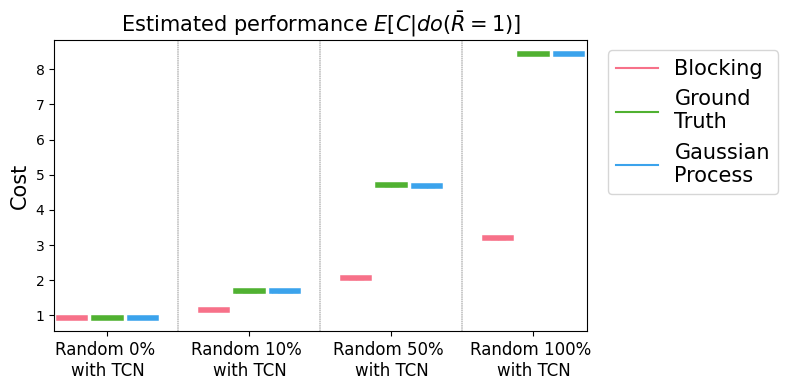

In [16]:
figure, table_list = plot_estimation_results( J_bootstrap_list, afa_report.agent_names,  title = None, figsize=(8,4))

In [15]:
figure.savefig('/home2/joshua.wendland/Documents/sepsis/figures/AFAPE_synthetic_4/estimation_results.pdf', bbox_inches='tight')